In [7]:
import os
import pandas as pd
from dotenv import load_dotenv
import mysql.connector
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pandas.plotting import register_matplotlib_converters
from powerbiclient import QuickVisualize, get_dataset_config, Report
from powerbiclient.authentication import DeviceCodeLoginAuthentication


load_dotenv()

# Now access the variables using os.getenv
DATABASE_HOST = os.getenv('DATABASE_HOST')
DATABASE_USERNAME = os.getenv('DATABASE_USERNAME')
DATABASE_PASSWORD = os.getenv('DATABASE_PASSWORD')
DATABASE_NAME = os.getenv('DATABASE_NAME')

In [8]:
try:
    print("Connecting to the database...")
    # Pass connection parameters as keyword arguments
    db_manager = mysql.connector.connect(host=DATABASE_HOST, user=DATABASE_USERNAME, passwd=DATABASE_PASSWORD, db=DATABASE_NAME)
    cursor = db_manager.cursor()
    cursor.execute("SHOW TABLES")  # This is the correct method to list all databases
    for db in cursor:
        print(db)
    print("Connected:", db_manager)
except mysql.connector.Error as e:
    print("Error while connecting to MySQL", e)

Connecting to the database...
(bytearray(b'AllReleaseVersion'),)
(bytearray(b'FirstReleases'),)
(bytearray(b'LatestReleases'),)
(bytearray(b'SeriesMetaData'),)
Connected: <mysql.connector.connection.MySQLConnection object at 0x000001B0CE77EE70>


In [9]:
existing_data_query = f"SELECT * FROM research.FirstReleases Where Series = 'UNRATE';"
print(f"SQL Statement - Retrieve Existing Data:\n{existing_data_query}")
cursor.execute(existing_data_query)
existing_rows = cursor.fetchall()
existing_df = pd.DataFrame()
existing_df = pd.DataFrame(existing_rows, columns= ['sql_upload_datetime', 'Published Date', 'Reporting Date', 'Value', 'Series', 'Unique Key', 'Website URL', 'JSON URL'] )
existing_df = existing_df.sort_values(by='Reporting Date', ascending=False)

# Set pandas display options for large dataframes
pd.set_option('display.max_rows', 10)  # Adjust as needed
pd.set_option('display.max_columns', 10)  # Adjust as per your dataframe's column count
pd.set_option('display.width', 1000)  # Set to your notebook's width
pd.set_option('display.max_colwidth', None)  # Display full content of each column

# Utilize the Styler API for a nicer display
styled_df = existing_df.style.set_table_styles(
    [{'selector': 'th', 'props': [('font-size', '12pt')]}]  # Header font size
).set_properties(**{
    'background-color': '#f7fbff',  # Light blue background for better readability
    'color': 'black',  # Ensure the text is black for contrast
    'border-color': 'white'  # Set border color
}).set_caption("UNRATE Series Data")  # Set a caption for the table

# Display the styled dataframe in the notebook
styled_df

SQL Statement - Retrieve Existing Data:
SELECT * FROM research.FirstReleases Where Series = 'UNRATE';


,sql_upload_datetime,Published Date,Reporting Date,Value,Series,Unique Key,Website URL,JSON URL
465,2024-04-13 11:38:31,2024-04-05 00:00:00,2024-03-01 00:00:00,3.800000,UNRATE,91a0390aecfa03ba41591b634a542f2b185e512427d625bede4428636014973f,https://fred.stlouisfed.org/series/UNRATE,https://api.stlouisfed.org/fred/series/observations?series_id=UNRATE&realtime_start=1776-07-04&realtime_end=2024-04-13&api_key=948f94dc85df484f430ca2dfeeba39fe&file_type=json
914,2024-04-13 11:38:31,2024-03-08 00:00:00,2024-02-01 00:00:00,3.900000,UNRATE,1902726b1a2c08825c0ca1de9e65f1d30b715809f89bea8bb8548d905aab85ae,https://fred.stlouisfed.org/series/UNRATE,https://api.stlouisfed.org/fred/series/observations?series_id=UNRATE&realtime_start=1776-07-04&realtime_end=2024-04-13&api_key=948f94dc85df484f430ca2dfeeba39fe&file_type=json
464,2024-04-13 11:38:31,2024-02-02 00:00:00,2024-01-01 00:00:00,3.700000,UNRATE,8eb62780c9f56b008e6bebca381c921f9b4d001a0ddddc65db5b473bd9f4ef6e,https://fred.stlouisfed.org/series/UNRATE,https://api.stlouisfed.org/fred/series/observations?series_id=UNRATE&realtime_start=1776-07-04&realtime_end=2024-04-13&api_key=948f94dc85df484f430ca2dfeeba39fe&file_type=json
463,2024-04-13 11:38:31,2024-01-05 00:00:00,2023-12-01 00:00:00,3.700000,UNRATE,a4dbb0504924b2e175a7512d1142195e5ed5b98ffbf56cb43b50af623f2cc7ac,https://fred.stlouisfed.org/series/UNRATE,https://api.stlouisfed.org/fred/series/observations?series_id=UNRATE&realtime_start=1776-07-04&realtime_end=2024-04-13&api_key=948f94dc85df484f430ca2dfeeba39fe&file_type=json
913,2024-04-13 11:38:31,2023-12-08 00:00:00,2023-11-01 00:00:00,3.700000,UNRATE,d0036eabce9a556f336709b1d1a77bf64cddf98ef12c53dd7b5995f9a9739401,https://fred.stlouisfed.org/series/UNRATE,https://api.stlouisfed.org/fred/series/observations?series_id=UNRATE&realtime_start=1776-07-04&realtime_end=2024-04-13&api_key=948f94dc85df484f430ca2dfeeba39fe&file_type=json
462,2024-04-13 11:38:31,2023-11-03 00:00:00,2023-10-01 00:00:00,3.900000,UNRATE,636cbfa34532cb55a3fb64cb7c98a9cc0b2bcaa55023a06ffee141653cbeba61,https://fred.stlouisfed.org/series/UNRATE,https://api.stlouisfed.org/fred/series/observations?series_id=UNRATE&realtime_start=1776-07-04&realtime_end=2024-04-13&api_key=948f94dc85df484f430ca2dfeeba39fe&file_type=json
461,2024-04-13 11:38:31,2023-10-06 00:00:00,2023-09-01 00:00:00,3.800000,UNRATE,52e88164bcda6492049a9b8cebf45d83b2749c54a597acaeeb2b2452dd8158b0,https://fred.stlouisfed.org/series/UNRATE,https://api.stlouisfed.org/fred/series/observations?series_id=UNRATE&realtime_start=1776-07-04&realtime_end=2024-04-13&api_key=948f94dc85df484f430ca2dfeeba39fe&file_type=json
460,2024-04-13 11:38:31,2023-09-01 00:00:00,2023-08-01 00:00:00,3.800000,UNRATE,897ae59ba152e0594e2d3a28f23551782c5589159f064608b0b4413d8d8d8d08,https://fred.stlouisfed.org/series/UNRATE,https://api.stlouisfed.org/fred/series/observations?series_id=UNRATE&realtime_start=1776-07-04&realtime_end=2024-04-13&api_key=948f94dc85df484f430ca2dfeeba39fe&file_type=json
912,2024-04-13 11:38:31,2023-08-04 00:00:00,2023-07-01 00:00:00,3.500000,UNRATE,fb9721a533461193b9d63097e5e8cfec8bef67a3e2b2f242149bcf52382cf3c1,https://fred.stlouisfed.org/series/UNRATE,https://api.stlouisfed.org/fred/series/observations?series_id=UNRATE&realtime_start=1776-07-04&realtime_end=2024-04-13&api_key=948f94dc85df484f430ca2dfeeba39fe&file_type=json
911,2024-04-13 11:38:31,2023-07-07 00:00:00,2023-06-01 00:00:00,3.600000,UNRATE,efa6c12e5ba6e063d97aad2d29e922b84b8e6695430c8e4f1dd8b40395f945cb,https://fred.stlouisfed.org/series/UNRATE,https://api.stlouisfed.org/fred/series/observations?series_id=UNRATE&realtime_start=1776-07-04&realtime_end=2024-04-13&api_key=948f94dc85df484f430ca2dfeeba39fe&file_type=json


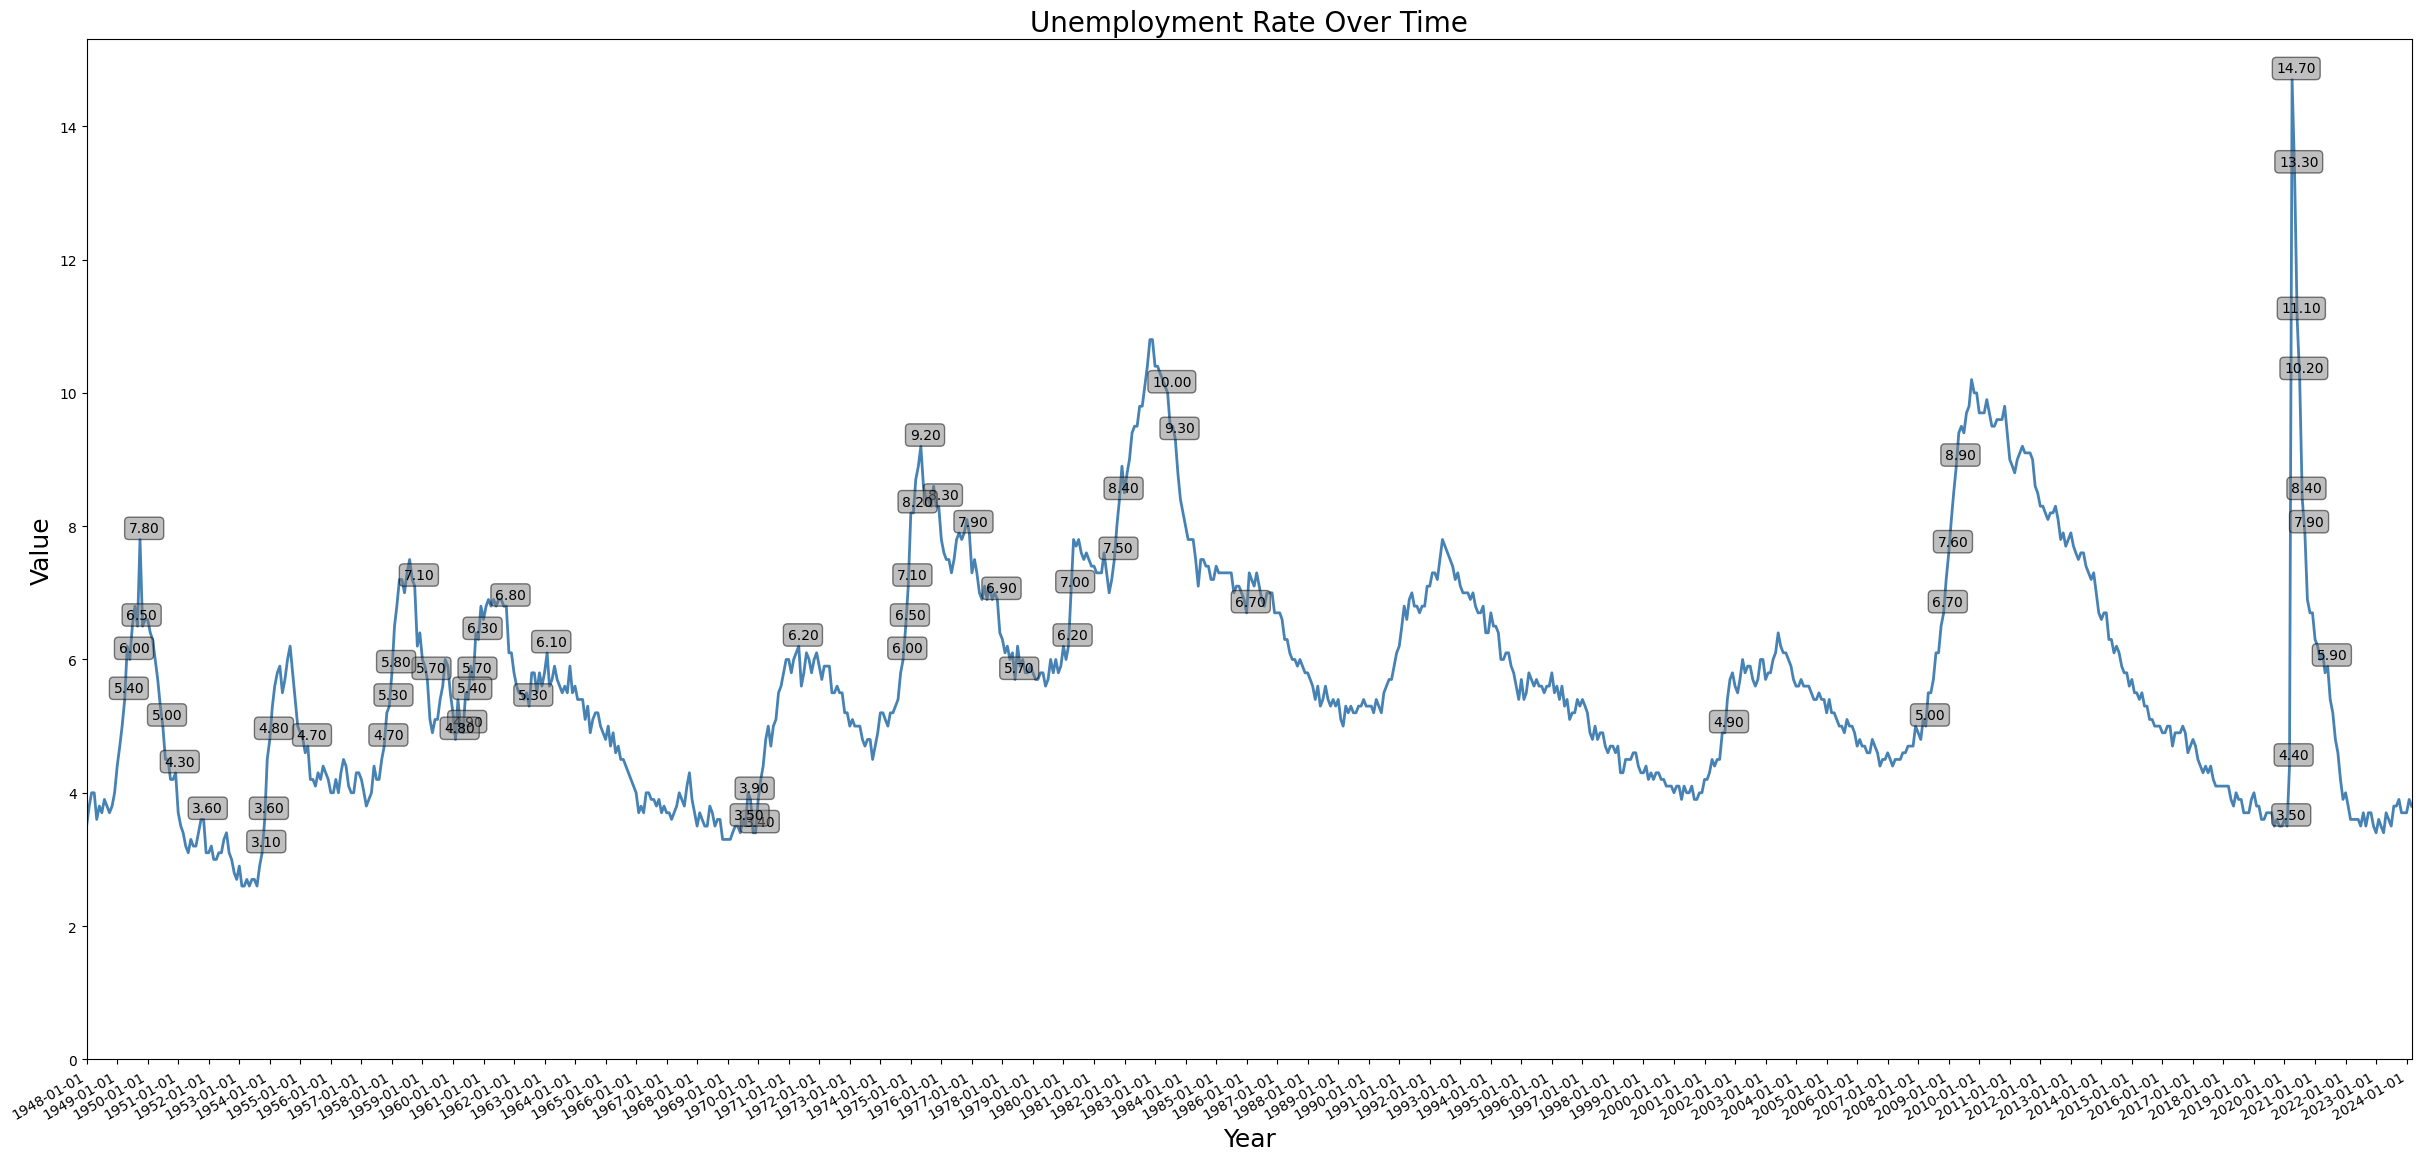

In [20]:

# Make the figure larger and more readable
plt.figure(figsize=(30, 15))

# Plot the data
plt.plot(existing_df['Reporting Date'], existing_df['Value'], color='steelblue', linewidth=2)

plt.xlim(left=existing_df['Reporting Date'].min(), right=existing_df['Reporting Date'].max())

# Calculate the differences from the previous data point
existing_df['Value Change'] = existing_df['Value'].diff()

# Determine a threshold for significant change
threshold = existing_df['Value Change'].std()  # This could be a standard deviation or a fixed value


# Annotate points with a large change from the previous point
for i in range(1, len(existing_df)):  # start from 1 because the 0th element has no previous point
    if abs(existing_df.iloc[i]['Value Change']) > threshold:
        plt.annotate(
            f"{existing_df.iloc[i]['Value']:.2f}",  # Format the value to 2 decimal places
            xy=(existing_df.iloc[i]['Reporting Date'], existing_df.iloc[i]['Value']),
            xytext=(3,3),  # Shift text to the right and up
            textcoords="offset points",
            ha='center',
            va='bottom',  # Vertical alignment
            bbox=dict(boxstyle="round,pad=0.3", facecolor='gray', edgecolor='black', alpha=0.5)  # Styled box
        )

# Set x-axis to show dates formatted and rotate the labels for better readability
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gcf().autofmt_xdate()  # Auto rotates the x-axis labels

# Add labels and title
plt.xlabel("Year", fontsize=18)
plt.ylabel("Value", fontsize=18)
plt.title("Unemployment Rate Over Time", fontsize=20)

# Adjust y-axis limits to avoid extreme values if necessary
plt.ylim(bottom=0)  # Assuming 'Value' doesn't contain negative numbers


# Save the plot as a file
plt.savefig('trend_plot.png', format='png', dpi=300)

# Show the plot
plt.show()

In [16]:
auth = DeviceCodeLoginAuthentication()

Performing device flow authentication. Please follow the instructions below.
To sign in, use a web browser to open the page https://microsoft.com/devicelogin and enter the code D6MYUHYHN to authenticate.

Device flow authentication successfully completed.
You are now logged in .

The result should be passed only to trusted code in your notebook.


In [17]:
# Create a Power BI report from your data
PBI_visualize = QuickVisualize(get_dataset_config(existing_df), auth=auth)

PBI_visualize

QuickVisualize()

In [123]:
PBI_visualize

QuickVisualize()
